In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [5]:
data = pd.read_csv('../../data/star_classification.csv')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
# Counting up the number of tag occurences in class column
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [7]:
class_frequency = data['class'].map(len)
class_frequency

0        6
1        6
2        6
3        6
4        6
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: class, Length: 100000, dtype: int64

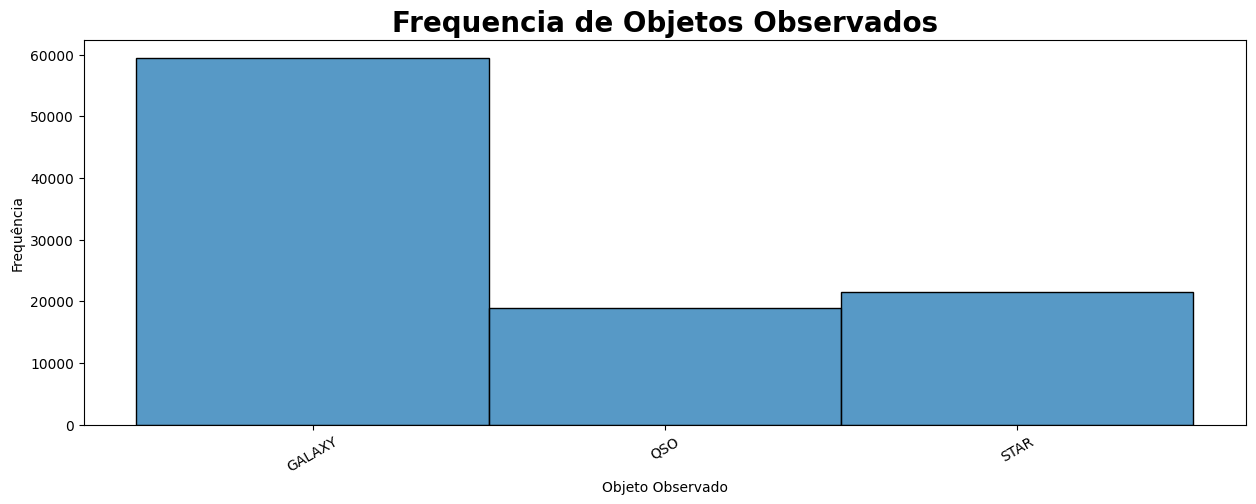

In [8]:
plt.figure(figsize=(15, 5))
plt.title('Frequencia de Objetos Observados', fontsize=20, weight='bold')
sns.histplot(
    data=class_frequency,
    bins=class_frequency.nunique(),
    x= data['class']
)
plt.xticks(rotation=30)
plt.xlabel('Objeto Observado')
plt.ylabel('Frequência')
plt.show()

In [9]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [10]:
from sklearn.preprocessing import LabelEncoder
#creating labelEncoder
le = LabelEncoder()
#Converting string labels into numbers.
data['class']=le.fit_transform(data['class'])

In [11]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [12]:
#getting unique values for class column
data['class'].unique()

array([0, 1, 2])

In [13]:
#separating data into features and labels
X = data.drop('class', axis=1)
y = data['class']

In [14]:
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train)}\tTest size: {len(y_test)}")

=> Train size: 80000	Test size: 20000


In [16]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Training the model
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [18]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [19]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11860
           1       0.94      0.92      0.93      3797
           2       0.91      1.00      0.95      4343

    accuracy                           0.95     20000
   macro avg       0.94      0.96      0.95     20000
weighted avg       0.95      0.95      0.95     20000



/Users/joaotaves/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


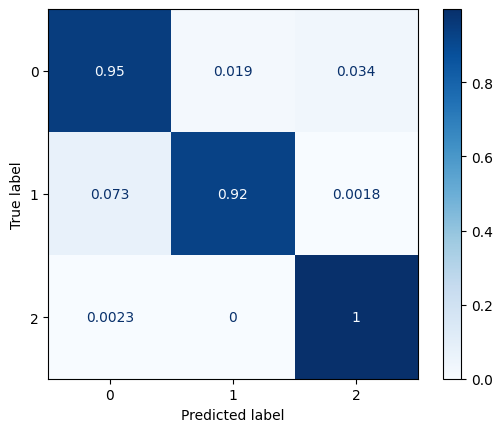

In [20]:
#plotting the confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true')

In [21]:
#applying PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29333543, 0.18646823])

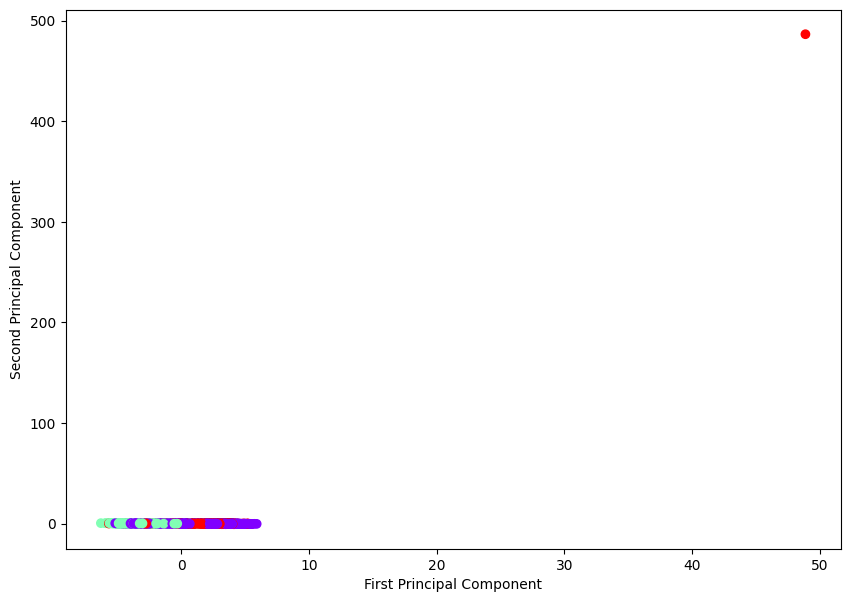

In [22]:
# plot pca
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [23]:
# Training the model
model_pca = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model_pca.fit(X_train, y_train)

SVC(class_weight='balanced')

In [24]:
# Predicting the test set results
y_pred_pca = model_pca.predict(X_test)

In [25]:
# Evaluating the model
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61     11860
           1       0.43      0.74      0.54      3797
           2       0.42      0.57      0.48      4343

    accuracy                           0.56     20000
   macro avg       0.54      0.60      0.54     20000
weighted avg       0.63      0.56      0.57     20000



/Users/joaotaves/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


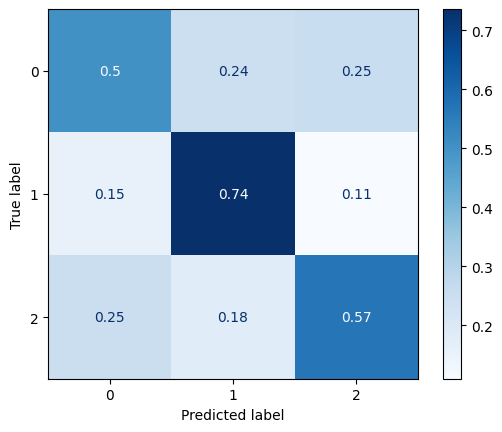

In [26]:
# plot PCA confusion matrix
plot_confusion_matrix(model_pca, X_test, y_test, cmap='Blues', normalize='true')

### Converting into 2 classes for classification

In [31]:
X_2 = data.drop('class', axis=1)
y_2 = data['class'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train)}\tTest size: {len(y_test)}")

=> Train size: 80000	Test size: 20000


In [33]:
y_2.unique()

array([0, 1])

In [34]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Training the model
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [36]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [37]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11860
           1       0.93      0.92      0.92      8140

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



/Users/joaotaves/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


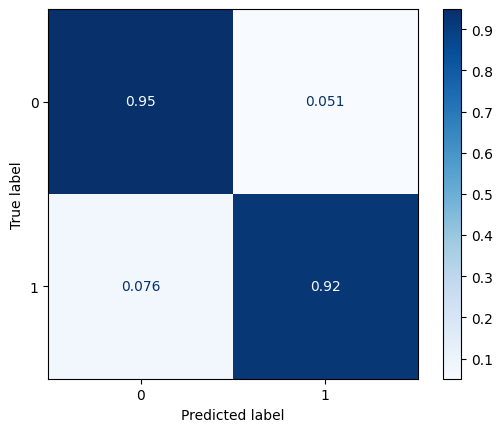

In [38]:
# plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', normalize='true')

In [39]:
# splitting data for pca analysis
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train)}\tTest size: {len(y_test)}")

=> Train size: 80000	Test size: 20000


In [40]:
#applying PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train_pca)
X_test = pca.transform(X_test_pca)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 6.04415122e-12])

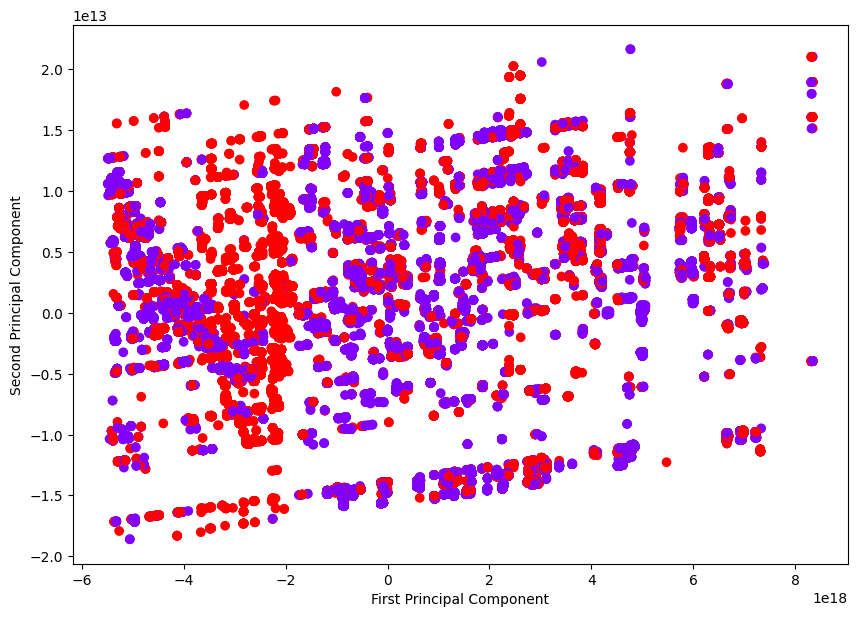

In [41]:
# plot pca
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [42]:
# Training the model
model_pca = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model_pca.fit(X_train_pca, y_train_pca)

In [ ]:
# Predicting the test set results
y_pred_pca = model_pca.predict(X_test)

In [ ]:
# Evaluating the model
print(classification_report(y_test, y_pred_pca))

In [ ]:
# plot PCA confusion matrix
plot_confusion_matrix(model_pca, X_test, y_test, cmap='Blues', normalize='true')

 __*Finding the best weights for the imbalanced classes*__

In [ ]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"=> Train size: {len(X_train_g)}\tTest size: {len(y_test_g)}")

=> Train size: 80000	Test size: 20000


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

model = SVC()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
randomsearch = RandomizedSearchCV(estimator = model, 
                          param_distributions = param_grid,
                          cv = StratifiedKFold(), 
                          n_jobs = -1, 
                          scoring = 'f1', 
                          verbose = 2).fit(X_train_g, y_train_g)

#Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({'score': randomsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)
best_weights = randomsearch.best_params_['class_weight']
best_weights

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time= 4.4min
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time= 5.1min
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time= 5.2min
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time= 5.4min
[CV] END class_weight={0: 0.7064321608040202, 1: 0.29356783919597984}; total time= 5.5min
[CV] END class_weight={0: 0.6268341708542714, 1: 0.3731658291457286}; total time= 5.2min
[CV] END class_weight={0: 0.6268341708542714, 1: 0.3731658291457286}; total time= 5.0min
[CV] END class_weight={0: 0.6268341708542714, 1: 0.3731658291457286}; total time= 4.6min
[CV] END class_weight={0: 0.6268341708542714, 1: 0.3731658291457286}; total time= 4.6min
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=15.7min
[CV] END class_weight={0: 0.069648241206030

{0: 0.26864321608040204, 1: 0.731356783919598}

In [ ]:
best_weights = randomsearch.best_params_['class_weight']

In [ ]:
randomsearch.cv_results_['mean_test_score']

array([0.3547727 , 0.        , 0.3547727 , 0.        , 0.44938828,
       0.        , 0.        , 0.        , 0.        , 0.36177118])

<AxesSubplot:title={'center':'Randomized Search CV Scores'}>

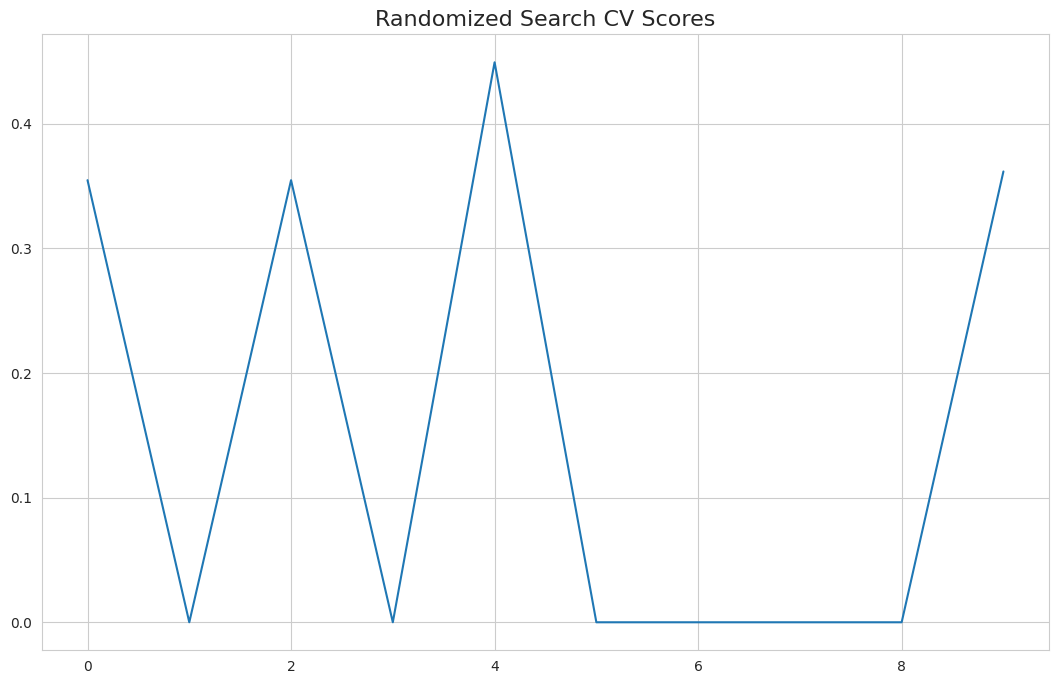

In [ ]:
# plot the scores of the random search
plt.figure(figsize=(13, 8))
plt.title("Randomized Search CV Scores", fontsize=16)
pd.Series(randomsearch.cv_results_["mean_test_score"]).plot()

In [ ]:
best_weights

{0: 0.26864321608040204, 1: 0.731356783919598}

In [ ]:
# Training the model
model = SVC(class_weight=best_weights, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC(class_weight={0: 0.26864321608040204, 1: 0.731356783919598})

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     15692
           1       0.42      0.51      0.46      4308

    accuracy                           0.74     20000
   macro avg       0.64      0.66      0.65     20000
weighted avg       0.76      0.74      0.75     20000

